## BVP3 Exe 3 

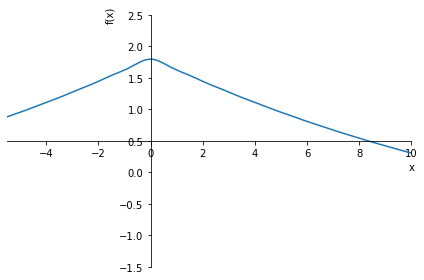

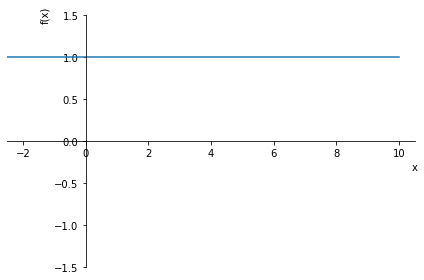

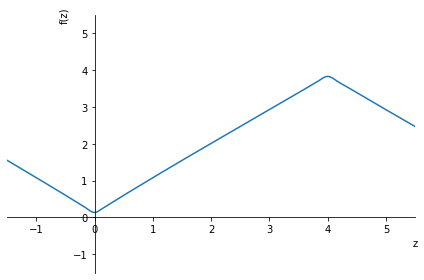

La norma de F(x,y,z)= 0.050346036115221*z*sin(0.050346036115221*x)  en la región xM=yM=20km por zM=5km es:  5.130199320647455


In [2]:
#Import all sympy module; enable us to work the equations 
#in the symbolic way. 
from sympy import *
#Import also the symbolic variables 'n' and 'x'
from sympy.abc import x, y, z, n, m, l
import numpy as np
import matplotlib.pyplot as plt
#from math import exp
#from numpy import nan
#Set a,b,c as parameters for limit of integration 
#and beta as mean velocity value with dimensions of [km*s^-1].

a=31.2
b=31.2
c=4
beta=0.01
H=10 #km
#Set the number of coeficients in the Fourier series.
enesima = 10

#Define the function f(x) as executable 
def f(z):
    f = z#*exp(-z*0.1)
    return f

def dg(x):
    dg = ((np.pi)/(2*a))*sin((np.pi)/(2*a)*x)
    return dg

def e(y):
    e = 1
    return e

def F(x,y,z):
    F = dg(x)*e(y)*f(z)
    return F


#Base con condiciones Neumann normalizada; componente x
varphi_i=np.sqrt(2/a)*cos((m*np.pi*x)/a)

#Base con condiciones Neumann normalizada; componente y
varphi_j=np.sqrt(2/b)*cos((n*np.pi*y)/b)

#Base con condiciones Neumann normalizada; componente z
varphi_k=np.sqrt(2/c)*cos((l*np.pi*z)/c)



#------------------Calculamos los coeficientes gi y ej----------------
#-----------considerando condiciones Neumann en las laterales-------
#dgi1=integrate(dg(x)*varphi_i,(x,0,a))
dgi1=(2*a)/((1+4*(m**2))*np.pi)

#ej1=integrate(e(y)*varphi_j,(y,0,b))
ej1=0

#-----------------Calculamos los coeficientes fk----------------------
#-----------considerando condiciones Mixtas en la vertical------------
#fk1=integrate(f(z)*varphi_k,(z,0,c))

#-----------------Coeficiente fk----------------------
#------considerando condiciones Neumann en la vertical------------
#---........Establacemos parámetros necesarios--------
w1=(l*np.pi/c)
gama=H/(1+((w1*H)**2))

fk1=((gama)**2)*np.sqrt(2/c)*(((-1)**l)*exp(-c/H)*((c/gama)-1+((H*w1)**2))+1-((H*w1)**2))

#----------------------------SERIES&PLOTS------------------------------

#inf=float(integrate((1/a)*np.sqrt(2/a)*dg(x)**2,(x,0,a)))
#inic = np.sqrt(inf)
dg0 = integrate((1/a)*dg(x),(x,0,a))
serie_dgm = dg0
for i in range(1,50):
    serie_dgm = serie_dgm + ((varphi_i*dgi1).subs(m,i))    
plot(serie_dgm, xlim=(-5.5, 10), ylim=(-1.5,2.5)) 

e0 = integrate((1/b)*e(y),(y,0,b))
serie_en = e0
for j in range(1,30):
    serie_en = serie_en + ((varphi_j*ej1).subs(n,j))
#Usando el modulo para graficas de sympy
plot(serie_en, xlim=(-2.5, 10.5), ylim=(-1.5,1.5)) 

f0 = integrate((1/c)*f(z),(z,0,c))
serie_fl = f0
for k in range(1,30):
    serie_fl = serie_fl + ((varphi_k*fk1).subs(l,k))
plot(serie_fl, xlim=(-1.5, 5.5), ylim=(-1.5,5.5))#(z,-6,6))


#----------------------Norma de F(x,y,z)------------------------------

fc = integrate(F(x,y,z)**2,(x,0,a),(y,0,b),(z,0,c))
normaF = np.sqrt(float(fc))
print( 'La norma de F(x,y,z)=',F(x,y,z),' en la región xM=yM=20km por zM=5km es: ', normaF)

In [3]:
#----------------------Norma de F-----------------------------------
dgc = integrate(dg(x)**2,(x,0,a))
normadg = np.sqrt(float(dgc))
print( 'La norma de dg(x)=',dg(x),' en el intervalo [ 0 ,',a,'] es: ', normadg)

ec = integrate(e(y)**2,(y,0,b))
normae = np.sqrt(float(ec))
print( 'La norma de e(y)=',e(y),' en el intervalo [ 0 ,',b,'] es: ', normae)

fc = integrate(f(z)**2,(z,0,c))
normaf = np.sqrt(float(fc))
print( 'La norma de f(z)=',f(z),' en el intervalo [ 0 ,',c,'] es: ', normaf)

normaF2 = normadg*normae*normaf                          
print("La norma de F(x,y,z) con m=n=l=20 es: ", float(normaF2))


#----------------------Norma de Fmnl-----------------------------------
norma_dgm=(np.sqrt(a)*dg0)**2
for i in range(1,21):
    norma_dgm = norma_dgm + (((dgi1)**2).subs(m,i))
print("\n\nLa norma de la serie dgm con m=20 es: ", float(sqrt(norma_dgm)))

norma_en=((np.sqrt(b)*e0)**2)
for j in range(1,21): 
    norma_en = norma_en + ((ej1)**2)#.subs(n,j))
print("La norma de la serie en con n=20 es: ", float(sqrt(norma_en)))    

norma_fl=0
for k in range(0,20):
    norma_fl = norma_fl + ((fk1)**2).subs(l,k)
print("La norma de la serie fl con l=20 es: ", float(sqrt(norma_fl)))    


normaFmnl2 = sqrt(norma_dgm)*sqrt(norma_en)*sqrt(norma_fl)                          
print("La norma de la serie Fnml con m=n=l=20 es: ", float(normaFmnl2))

La norma de dg(x)= 0.050346036115221*sin(0.050346036115221*x)  en el intervalo [ 0 , 31.2 ] es:  0.1988509097269515
La norma de e(y)= 1  en el intervalo [ 0 , 31.2 ] es:  5.585696017507576
La norma de f(z)= z  en el intervalo [ 0 , 4 ] es:  4.618802153517006
La norma de F(x,y,z) con m=n=l=20 es:  5.130199320647456


La norma de la serie dgm con m=20 es:  4.200644095740534
La norma de la serie en con n=20 es:  5.585696017507576
La norma de la serie fl con l=20 es:  42.32571294250908
La norma de la serie Fnml con m=n=l=20 es:  993.110254320282


In [6]:
#Generamos tabla de comparación para medir la convergencia.
print('{:^15}{:^15}{:^15}{:^15}'.format('n,m,l','|F|','|F_mnl|','|F|-|F_mnl|'))
Pasos=1
for u in range(5):
    
    norma_dgm=(np.sqrt(a)*dg0)**2
    for i in range(1,Pasos):
        norma_dgm = norma_dgm + (((dgi1)**2).subs(m,i))
    
    norma_en=((np.sqrt(b)*e0)**2)
    for j in range(1,Pasos): 
        norma_en = norma_en + ((ej1)**2)#.subs(n,j))           
    
    norma_fl=((np.sqrt(c)*f0)**2)
    for k in range(1,Pasos):
        norma_fl = norma_fl + ((fk1)**2).subs(l,k) 
    
    normaFmnl2 = sqrt(norma_dgm)*sqrt(norma_en)*sqrt(norma_fl)          
    
     #En cada paso va sumando la norma término a termino    
    convergencia = beta*(normaF - normaFmnl2)
    print('{:^15}{:^15.6f}{:^15.6f}{:^15.13f}'.format(Pasos,float(normaF),normaFmnl2,abs(convergencia)))
    Pasos=Pasos+30

     n,m,l           |F|          |F_mnl|      |F|-|F_mnl|  
       1          5.130199       4.000000    0.0113019932065
      31          5.130199      106.481384   1.0135118448619
      61          5.130199      106.482214   1.0135201463433
      91          5.130199      106.482299   1.0135210007360
      121         5.130199      106.482320   1.0135212104252


In [65]:
#-...-Límites de integración inicialización-------------------
xyM = 12
xym = 8
zM = 3
zm = 2

#-----------Calclulo de la integral de Fmnl2-----------------
for n in range(3):
    int_ser1=integrate(serie_dgm,(x,xym,xyM))
    int_ser2=integrate(serie_en,(y,xym,xyM))
    int_ser3=integrate(serie_fl,(z,zm,zM))
    int_Fmnl2 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
    int_F2 = integrate(F(x,y,z),(x,xym,xyM),(y,xym,xyM),(z,zm,zM))
    flux_1 = beta*(int_F2-int_Fmnl2)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

    PorcentajeMasa=(3*100*3600*abs(flux_1))/((xyM-xym)*(xyM-xym)*(zM-zm))
    
#---------------------Resultados------------------------------
    print('\n\n Flujo en la subregión (',xym,',',xyM,')^{2}x(',zm,',',zM,') --> ',flux_1)
    print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa)
    xyM = xyM + 4
    xym = xym - 4
    zM = zM + 1
    zm = zm - 1



 Flujo en la subregión ( 8 , 12 )^{2}x( 2 , 3 ) -->  8.80044957239279e-9
 %Masa que fluye en la subregión en 3hr   -->  0.000594030346136513


 Flujo en la subregión ( 4 , 16 )^{2}x( 1 , 4 ) -->  1.74800498381714e-7
 %Masa que fluye en la subregión en 3hr   -->  0.000437001245954285


 Flujo en la subregión ( 0 , 20 )^{2}x( 0 , 5 ) -->  9.01547089179412e-6
 %Masa que fluye en la subregión en 3hr   -->  0.00486835428156883


In [26]:
#-...-Límites de integración inicialización-------------------
xyM1 = 31.2
xym1 = 0
zM1 = 4
zm1 = 0

#-----------Calclulo de la integral de Fmnl2-----------------

int_ser1=integrate(serie_dgm,(x,xym1,xyM1))
int_ser2=integrate(serie_en,(y,xym1,xyM1))
int_ser3=integrate(serie_fl,(z,zm1,zM1))
int_Fmnl21 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
int_F21 = integrate(F(x,y,z),(x,xym1,xyM1),(y,xym1,xyM1),(z,zm1,zM1))
flux_11 = beta*(int_F21-int_Fmnl21)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

PorcentajeMasa1=(3*100*3600*abs(flux_11))/((xyM1-xym1)*(xyM1-xym1)*(zM1-zm1))
    
#---------------------Resultados------------------------------
print('\n\n Flujo en la subregión (',xym1,',',xyM1,')^{2}x(',zm1,',',zM1,') --> ',flux_11)
print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa1)



 Flujo en la subregión ( 0 , 31.2 )^{2}x( 0 , 4 ) -->  -2.84217094304040e-20
 %Masa que fluye en la subregión en 3hr   -->  7.88324041153957e-18
